# **Introduction:**

Stock price prediction refers to understanding various aspects of the stock market that can influence the price of a stock, and based on these potential factors, build a model to predict the stock's price. This can help individuals and institutions speculate on the stock price trend and help them decide whether to buy or short the stock price to maximize their profit.
While using Machine Learning and Time Series helps us to discover the future value of a particular stock and other financial assets traded on an exchange. The entire idea of analysis and prediction is to gain significant profits.

**Focus areas for Analysis:**
1. The change in closing price of the stock over time.
2. Visualization of Candlestick Monthly data.
3. The % daily return of the stock.
4. The moving average of various stocks.

**Prediction:**
We will be predicting future stock behaviour by predicting the closing price of the stock using LSTM.

# Import Libraries

In [189]:
#!pip install datetime yfinance seaborn matplotlib
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset:

I have taken the stock price data of United Breweries Holdings Limited from Yahoo Finance from 1st Jan 2022 to 1st Jan 2023

Time Period of Data:
Define the timeframe for which you want to fetch data.

In [128]:
start_date = datetime.datetime(2020, 1, 15)
end_date = datetime.datetime(2023, 12, 31)

Loading Data from Yahoo Finance

In [129]:
df = yf.download('UBL.NS', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


View Dataframe

In [130]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-15,1295.800049,1318.000000,1293.050049,1310.500000,1291.954346,211818
2020-01-16,1307.500000,1316.800049,1292.550049,1295.599976,1277.265259,239520
2020-01-17,1293.500000,1314.599976,1288.900024,1300.150024,1281.750854,581521
2020-01-20,1289.099976,1310.050049,1289.099976,1303.449951,1285.004150,131330
2020-01-21,1300.400024,1305.300049,1256.000000,1271.849976,1253.851318,384005
...,...,...,...,...,...,...
2023-12-22,1708.949951,1726.000000,1674.099976,1684.599976,1684.599976,354584
2023-12-26,1700.000000,1714.000000,1688.849976,1708.949951,1708.949951,336099
2023-12-27,1719.500000,1720.050049,1692.250000,1707.449951,1707.449951,147871


Check index

In [190]:
print(df.index)

DatetimeIndex(['2020-01-15', '2020-01-16', '2020-01-17', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=982, freq=None)


Reset Index

In [132]:
df1 = df.reset_index()
df1['Date'] = pd.to_datetime(df1['Date'])
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-15,1295.800049,1318.000000,1293.050049,1310.500000,1291.954346,211818
1,2020-01-16,1307.500000,1316.800049,1292.550049,1295.599976,1277.265259,239520
2,2020-01-17,1293.500000,1314.599976,1288.900024,1300.150024,1281.750854,581521
3,2020-01-20,1289.099976,1310.050049,1289.099976,1303.449951,1285.004150,131330
4,2020-01-21,1300.400024,1305.300049,1256.000000,1271.849976,1253.851318,384005
...,...,...,...,...,...,...,...
977,2023-12-22,1708.949951,1726.000000,1674.099976,1684.599976,1684.599976,354584
978,2023-12-26,1700.000000,1714.000000,1688.849976,1708.949951,1708.949951,336099
979,2023-12-27,1719.500000,1720.050049,1692.250000,1707.449951,1707.449951,147871
980,2023-12-28,1717.000000,1777.000000,1705.550049,1751.250000,1751.250000,485581


Converting from Daily to Monthly Frequency data

In [154]:
monthly_data = df.resample('M').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})
monthly_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,1295.800049,1318.000000,1250.500000,1264.000000,3729980
2020-02-29,1279.000000,1356.000000,1211.050049,1245.650024,8414663
2020-03-31,1255.199951,1272.000000,749.500000,918.849976,12636371
2020-04-30,927.500000,983.700012,860.000000,938.599976,12262357
2020-05-31,975.000000,1008.150024,859.200012,957.000000,18855217


Plot - Line and Frequency -Daily closing Price

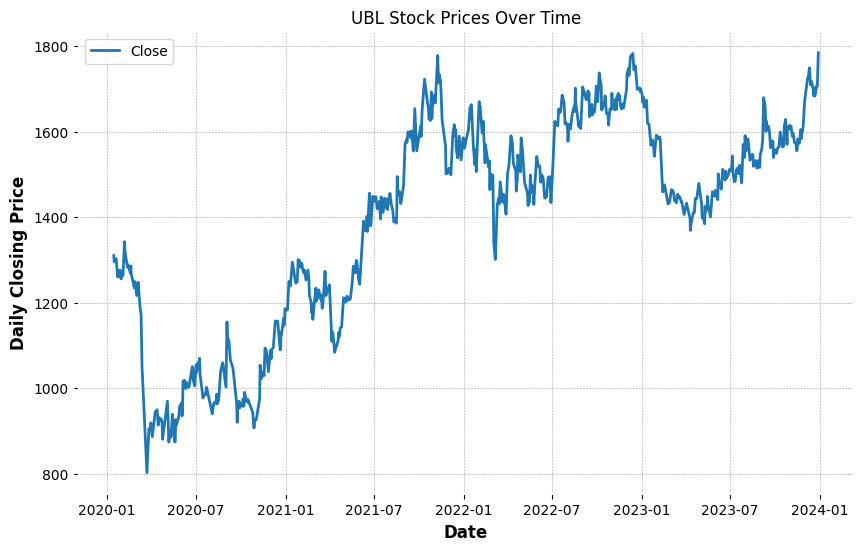

In [191]:
# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(df['Date'], df['Open'], label='Open')
#plt.plot(df['Date'], df['High'], label='High')
#plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df.index, df['Close'], label='Close')

plt.title('UBL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')
plt.legend()
plt.grid(True)
plt.show()

Plot - Candlestick and Frequency - Monthly OHLC Volume Data

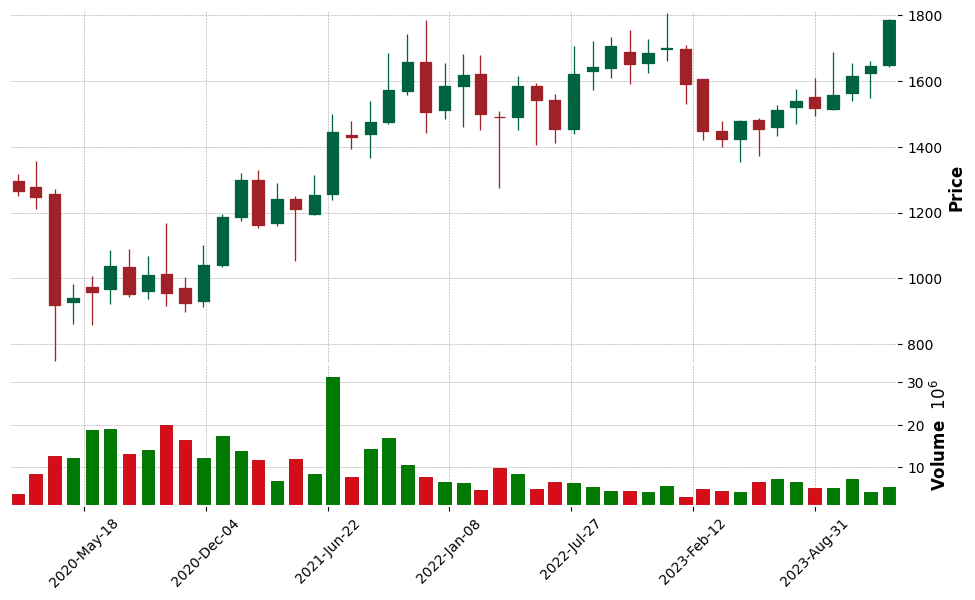

In [155]:
# Plotting monthly candlestick chart with a separate volume plot with MA(20)
#mpf.plot(monthly_data, type='candle', style='charles', volume=True, mav=(20), show_nontrading=True, addplot=mpf.make_addplot(monthly_data['Volume'], panel=1, ylabel='Volume'),tight_layout=True, figratio=(16, 9), scale_width_adjustment=dict(volume=0.7, candle=1))

# Plotting monthly candlestick chart with a separate volume plot
mpf.plot(monthly_data, type='candle', style='charles', volume=True, show_nontrading=True, tight_layout=True, figratio=(16, 9), scale_width_adjustment=dict(volume=0.7, candle=1))

Total Rows & Columns

In [156]:
df.shape

(982, 6)

Data Information

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 982 entries, 2020-01-15 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       982 non-null    float64
 1   High       982 non-null    float64
 2   Low        982 non-null    float64
 3   Close      982 non-null    float64
 4   Adj Close  982 non-null    float64
 5   Volume     982 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 53.7 KB


**Data Quality Check**

Duplicate Values

In [192]:
len(df[df.duplicated()])

0

Missing Values/Null Values

In [159]:
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [139]:
#Visualizing the missing values using heatmap
#sns.heatmap(df.isnull(), cbar=False)

Variable Information

In [160]:
#Columns
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [193]:
#Describe
df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,MA for 200 days,Daily Return
count,982.000000,982.000000,982.000000,982.000000,982.000000,9.820000e+02,973.000000,963.000000,933.000000,783.000000,981.000000
mean,1395.475459,1414.538795,1375.865022,1394.270214,1382.424134,4.593019e+05,1393.212750,1392.160432,1390.430325,1411.961092,0.000469
std,248.288093,248.548949,248.501029,248.759445,250.134854,4.688773e+05,246.907868,245.233741,241.375751,206.063537,0.017559
min,832.500000,840.000000,749.500000,802.500000,791.143372,0.000000e+00,880.330005,900.540002,911.357999,992.602752,-0.100790
25%,1215.500000,1236.137451,1195.912506,1214.375000,1199.846436,1.968495e+05,1210.804993,1207.081247,1193.684993,1235.783001,-0.008349
50%,1460.000000,1477.849976,1440.724976,1458.299988,1445.695923,3.190280e+05,1462.389978,1474.914996,1485.973000,1524.548502,0.000361
75%,1593.350006,1609.700043,1575.899994,1592.187469,1581.892517,5.758538e+05,1589.574988,1591.380008,1584.783003,1556.471125,0.009854
max,1797.900024,1806.449951,1778.250000,1785.150024,1785.150024,5.523161e+06,1764.210010,1739.702509,1699.449009,1617.856253,0.081310


In [194]:
#Check unique values for each variable
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Open is 833 .
No. of unique values in  High is 894 .
No. of unique values in  Low is 911 .
No. of unique values in  Close is 949 .
No. of unique values in  Adj Close is 964 .
No. of unique values in  Volume is 979 .
No. of unique values in  MA for 10 days is 971 .
No. of unique values in  MA for 20 days is 963 .
No. of unique values in  MA for 50 days is 933 .
No. of unique values in  MA for 200 days is 782 .
No. of unique values in  Daily Return is 977 .


# Analysis

Plotting Moving Average (50,200) is a simple technal analysis that smooths out price data.

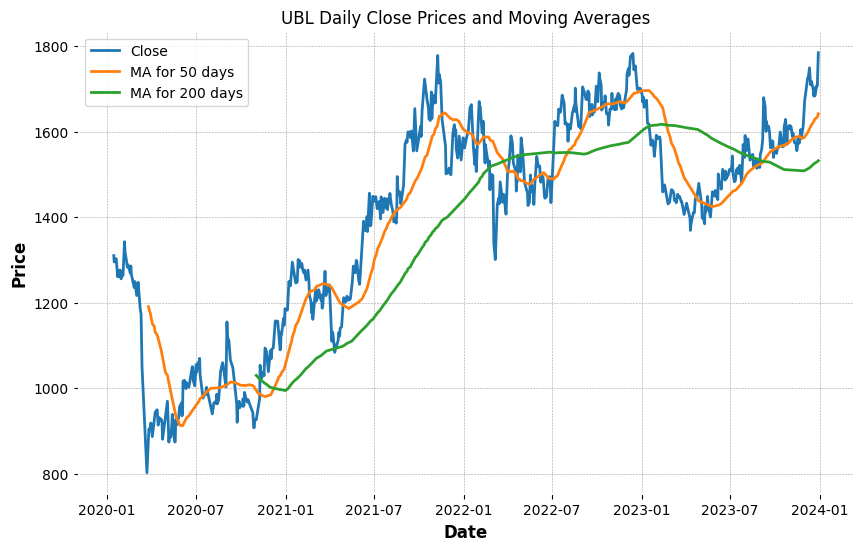

In [176]:
ma_day = [50, 200]

plt.figure(figsize=(10, 6))

# Plot Close price
plt.plot(df.index, df['Close'], label='Close')

# Plot Moving Averages
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name]=df['Close'].rolling(ma).mean()
    plt.plot(df.index, df[column_name], label=column_name)

plt.title('UBL Daily Close Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Average Daily Returns

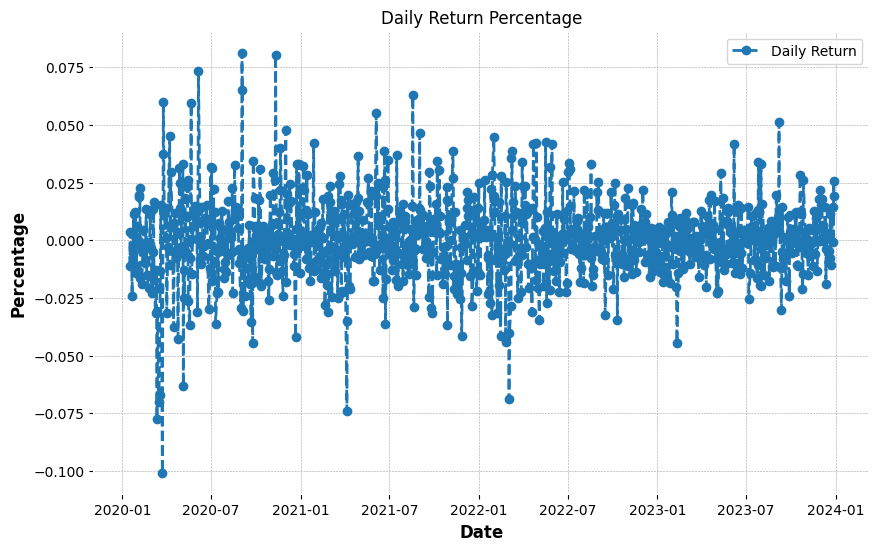

In [170]:
# Calculate daily return percentage
df['Daily Return'] = df['Close'].pct_change()


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Daily Return'], linestyle='--', marker='o', label='Daily Return')

plt.title('Daily Return Percentage')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

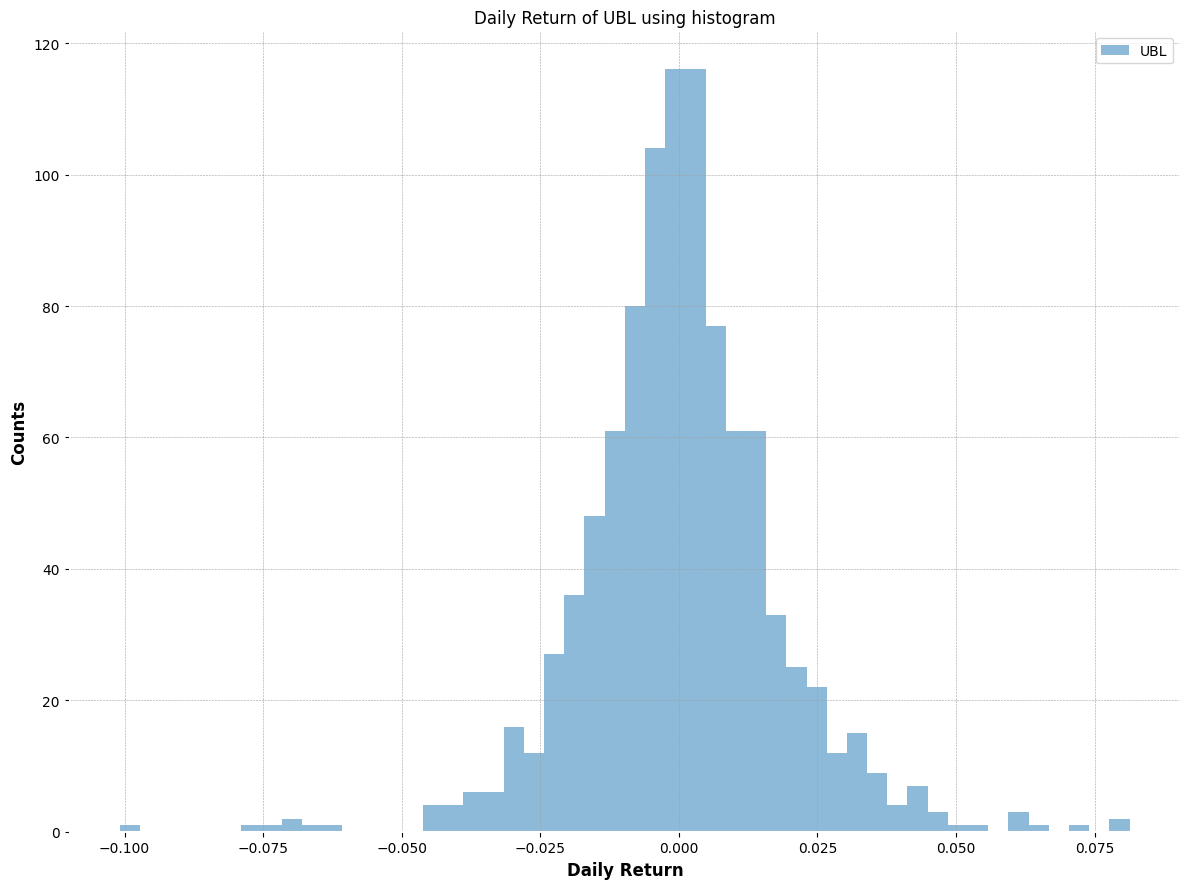

In [195]:
plt.figure(figsize=(12, 9))
df['Daily Return'].hist(bins=50, alpha=0.5, label='UBL')

plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Daily Return of UBL using histogram')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Prediction using LTSM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture well-suited for sequence prediction problems.

**2.0 Before Prediction**

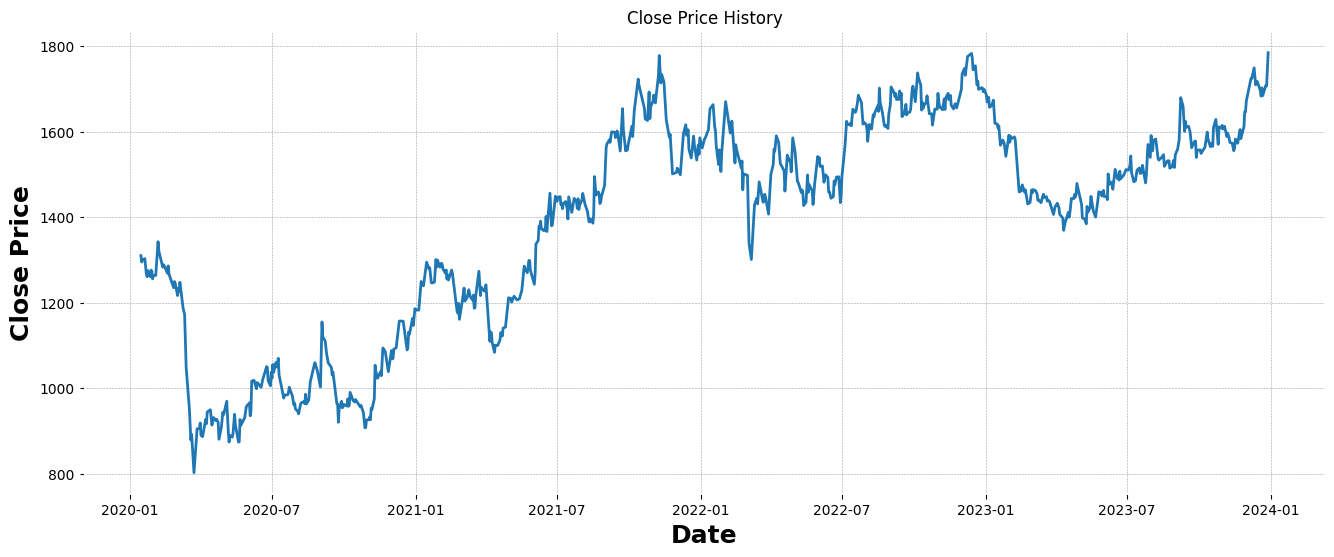

In [146]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

**2.1 Data Prepartion**

In [179]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array because ML/DL libraries requires numpy arrays as inputs
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

786

**2.2 Data Scaling**

In [180]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.51696941],
       [0.5018063 ],
       [0.50643669],
       [0.50979488],
       [0.47763697],
       [0.47382075],
       [0.46659542],
       [0.48094435],
       [0.46684983],
       [0.48247083],
       [0.47987588],
       [0.46155807],
       [0.46964839],
       [0.46975013],
       [0.4939704 ],
       [0.51956448],
       [0.55004324],
       [0.52750212],
       [0.5018063 ],
       [0.49600571],
       [0.48934001],
       [0.49503886],
       [0.49244391],
       [0.47941786],
       [0.47519457],
       [0.49244391],
       [0.47270136],
       [0.44598788],
       [0.44497022],
       [0.44059425],
       [0.45514679],
       [0.45097442],
       [0.42186947],
       [0.4386608 ],
       [0.432453  ],
       [0.45336589],
       [0.43174069],
       [0.39256092],
       [0.37699073],
       [0.28438401],
       [0.25054693],
       [0.175851  ],
       [0.15524346],
       [0.09001171],
       [0.07785071],
       [0.0915382 ],
       [0.        ],
       [0.030

**2.3 Creating Training Data**

In [181]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.51696941, 0.5018063 , 0.50643669, 0.50979488, 0.47763697,
       0.47382075, 0.46659542, 0.48094435, 0.46684983, 0.48247083,
       0.47987588, 0.46155807, 0.46964839, 0.46975013, 0.4939704 ,
       0.51956448, 0.55004324, 0.52750212, 0.5018063 , 0.49600571,
       0.48934001, 0.49503886, 0.49244391, 0.47941786, 0.47519457,
       0.49244391, 0.47270136, 0.44598788, 0.44497022, 0.44059425,
       0.45514679, 0.45097442, 0.42186947, 0.4386608 , 0.432453  ,
       0.45336589, 0.43174069, 0.39256092, 0.37699073, 0.28438401,
       0.25054693, 0.175851  , 0.15524346, 0.09001171, 0.07785071,
       0.0915382 , 0.        , 0.03052969, 0.08131076, 0.09377705,
       0.10446245, 0.10542917, 0.11840429, 0.08873964, 0.08594109,
       0.12690175, 0.11677606, 0.14455807, 0.14995163, 0.11341781])]
[0.12038872930727196]

[array([0.51696941, 0.5018063 , 0.50643669, 0.50979488, 0.47763697,
       0.47382075, 0.46659542, 0.48094435, 0.46684983, 0.48247083,
       0.47987588, 0.46155807, 0.46

**2.4 Model Building**

In [196]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

**2.5 Model Training**

In [183]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

726/726 [==============================] - 47s 59ms/step - loss: 0.0044


**2.6 Creating Testing Data**

In [197]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

**2.7 Making Predictions**

In [185]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 36ms/step


**2.8 Model Evaluations**

In [186]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

43.171099893335175

**2.9 Visualization**

<ipython-input-198-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


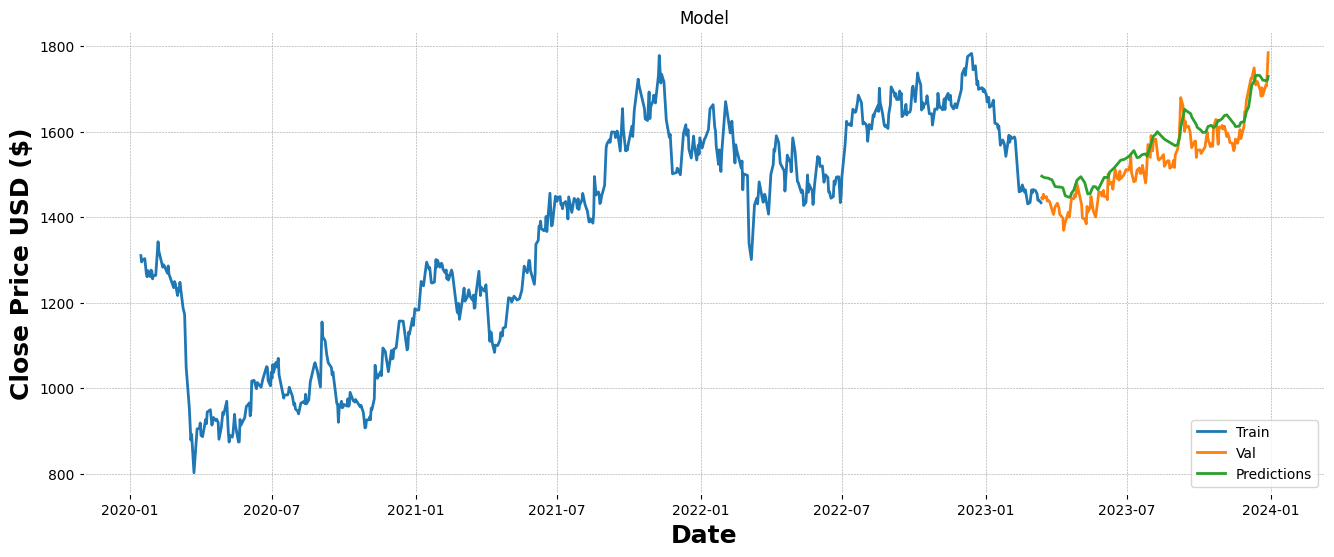

In [198]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()